<center><h1>Design for an Audience</h1></center>

<h2>1. Introduction</h2>
<br>
<div><p>Depending who we're making the graphs for, we have two kinds of data visualization:</p>
<ul>
<li>Exploratory data visualization: we create graphs for <em>ourselves</em> to better understand and explore data.</li>
<li>Explanatory data visualization: we create graphs for <em>others</em> to inform, make a point, or tell a story.</li>
</ul>
<p></p><center>
<img src="course_intro.svg" alt="img" width="600" height="400">
</center><p></p>
<p>Our focus in this course is explanatory data visualization — specifically, we're going to learn the following:</p>
<ul>
<li>How to better create graphs for an audience by using information design principles.</li>
<li>The elements of a story and how to create storytelling data visualizations with matplotlib.</li>
<li>How to create visual patterns using Gestalt principles.</li>
<li>How to guide the audience's attention with pre-attentive attributes.</li>
<li>How to use matplotlib built-in styles — with a case study on the FiveThirtyEight style.</li>
</ul>
<p>Below, we see a gallery of the data visualizations</p>
<p><img src="1.1-m525.png" alt="img" width="600" height="400"></p>
</div>

<h2>2. The Familiarity Principle</h2>
<br>
<div><p>Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is — the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.</p>
<p>Although unpleasant, we want to make readers more aware that people are dying because of this virus. To that end, we want to include a graph in the article that shows the top 20 countries by the number of deaths.</p>
<p>We've already collected the data and added it in the <code>top20_deathtoll.csv</code> file (the data was collected from <a href="https://www.worldometers.info/" target="_blank">Worldometer</a> on December 8, 2020):</p>
</div>

```python
import pandas as pd
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')
top20_deathtoll
```

<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Country_Other</th>
<th>Total_Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Turkey</td>
<td>15103.0</td>
</tr>
<tr>
<th>1</th>
<td>Chile</td>
<td>15663.0</td>
</tr>
<tr>
<th>2</th>
<td>Belgium</td>
<td>17386.0</td>
</tr>
<tr>
<th>3</th>
<td>Indonesia</td>
<td>18000.0</td>
</tr>
<tr>
<th>4</th>
<td>Germany</td>
<td>19539.0</td>
</tr>
<tr>
<th>5</th>
<td>Poland</td>
<td>20592.0</td>
</tr>
<tr>
<th>6</th>
<td>South Africa</td>
<td>22249.0</td>
</tr>
<tr>
<th>7</th>
<td>Peru</td>
<td>36324.0</td>
</tr>
<tr>
<th>8</th>
<td>Colombia</td>
<td>37995.0</td>
</tr>
<tr>
<th>9</th>
<td>Argentina</td>
<td>39888.0</td>
</tr>
<tr>
<th>10</th>
<td>Russia</td>
<td>44159.0</td>
</tr>
<tr>
<th>11</th>
<td>Spain</td>
<td>46646.0</td>
</tr>
<tr>
<th>12</th>
<td>Iran</td>
<td>50917.0</td>
</tr>
<tr>
<th>13</th>
<td>France</td>
<td>55521.0</td>
</tr>
<tr>
<th>14</th>
<td>Italy</td>
<td>60606.0</td>
</tr>
<tr>
<th>15</th>
<td>UK</td>
<td>61434.0</td>
</tr>
<tr>
<th>16</th>
<td>Mexico</td>
<td>110074.0</td>
</tr>
<tr>
<th>17</th>
<td>India</td>
<td>141005.0</td>
</tr>
<tr>
<th>18</th>
<td>Brazil</td>
<td>177388.0</td>
</tr>
<tr>
<th>19</th>
<td>USA</td>
<td>290798.0</td>
</tr>
</tbody>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')
top20_deathtoll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country_Other  20 non-null     object 
 1   Total_Deaths   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


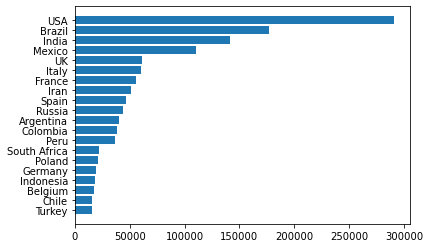

In [3]:
plt.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.show()

<p>This graph is our starting point. We're going to learn how to design it for our audience — by the end of this lesson, we'll get to this version:</p>
<p><img src="screen3_2.png" alt="img"></p>

<p>To make the changes we want, we'll use matplotlib's object-oriented interface. Matplotlib has two interfaces:</p>

<ul>
<li>A functional interface: we use functions to create and modify plots.</li>
<li>An object-oriented (OO) interface: we use methods to create and modify plots.</li>
</ul>
<p>The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast. But the OO interface offers more power and flexibility in graph editing.</p>


<h2>4. The OO Interface</h2>
<br>

<div><p>To create a graph using the OO interface, we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank"><code>plt.subplots()</code> function</a>, which generates an empty plot and returns a <code>tuple</code> of two objects:</p>
</div>

```python
plt.subplots()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff15c193850>)
```

<div>
<p><img src="screen3_3.png" alt="img"></p>
<p>We assign the two objects inside the <code>tuple</code> to variables <code>fig</code> and <code>ax</code>:</p>
</div>

```python
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
```
<div>
<p><img src="screen3_3.png" alt="img" width="400" height="200"></p>
</div>

<p>The <code>matplotlib.figure.Figure</code> object acts as a canvas on which we can add one or more plots. The <code>matplotlib.axes._subplots.AxesSubplot</code> object is the actual plot. In short, we have two objects:</p>
<ul>
<li>The <code>Figure</code> (the canvas)</li>
<li>The <code>Axes</code> (the plot; don't confuse with "axis," which is the x- and y-axis of a plot).</li>
</ul>
<p>To create a bar plot, we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html" target="_blank"><code>Axes.bar()</code> method</a> and call <code>plt.show()</code>to :</p>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
```
<p><img src="screen3_4.png" alt="img"></p>

<h3>Exercise</h3>
<br>
<ol>
<li>Use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.barh.html" target="_blank"><code>Axes.barh()</code></a> method to recreate the horizontal bar plot we previously generated.</li>
<li>Call <code>plt.show()</code> to display the plot.</li>
</ol>

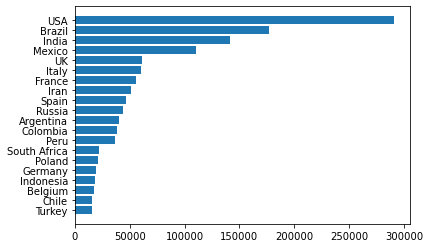

In [5]:
fig, ax = plt.subplots()
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.show()

<h2>5. Mobile-Friendly Proportions</h2>
<br>
<div><p>In the previous exercise, we used the OO approach to recreate the horizontal bar plot:</p></div>

<p>We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.</p>
<p><img src="5.1-m525.svg" alt="img" width="400" height="200"></p>
<p>To change the proportions, we can use the <code>figsize</code> parameter inside the <code>plt.subplots(figsize=(width, height))</code> function:</p>

```python
fig, ax = plt.subplots(figsize=(3, 5))
ax.barh(['A', 'B', 'C'],
        [2, 4, 16])
plt.show()
```

<p><img src="screen4_2.png" alt="img"></p>

<h3>Exercise</h3>
<br>
<ol>
<li>Recreate the horizontal bar plot with a width of <code>4.5</code> inches and a height of <code>6</code> inches.</li>
</ol>

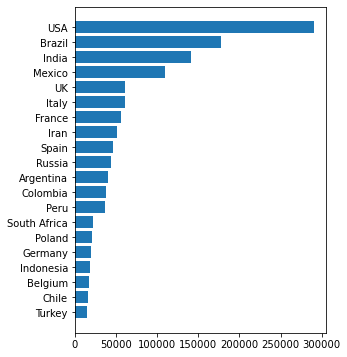

In [6]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.show()

<h2>6. Maximizing Data-Ink</h2>
<br>
<div><p>When we design graphs (and anything in general), we need design principles to guide us. Design principles help us in two ways:</p>
<ul>
<li>They generate design options.</li>
<li>They help us choose among those options.</li>
</ul>
<p>One design principle we've already covered is familiarity. For example, if we need to visually present a frequency distribution, familiarity gives us a few options: a histogram and a box plot (let's assume our audience is only familiar with these two). Our audience, however, is more familiar with histograms, so we choose a histogram for our presentation.</p>
<p>The next design principle we're going to learn has to do with maximizing data elements on a graph. Generally, a graph has three elements:</p>
<ul>
<li>Data elements: the numbers and the categories visually represented and the relationships between them.</li>
<li>Structural elements: the axes, the ticks, the legend, the grid, etc.</li>
<li>Decorations: extra colors, shapes, artistic drawings etc.</li>
</ul>
<p>Maximizing the data elements ensures the audience's attention is on the data — not on structure or decorations. Below, we see how removing structural elements and decorations can maximize data elements (GIF source: Darkhorse Analytics):</p>
<p><img src="data-ink.gif" alt="img" width="400" height="200"></p>
<p>Edward Tufte theorized the principle of maximizing data elements in his book <em>The Visual Display of Quantitative Information</em> (1983). From the total amount of ink used for printing a graph, some of the ink goes to show the data — that is the <strong>data-ink</strong>. As a sidenote, Tufte worked on his book in the 1980s, when most graphs were printed on paper using ink.</p>
<p>Tufte named the principle of maximizing data elements as <strong>maximizing the data-ink ratio</strong>. The data-ink ratio is the proportion of data-ink from the total ink:</p>
    
<p>
\begin{equation}
\text{Data-ink ratio} = \frac{\text{data-ink}}{\text{total ink used to print the graph}}
\end{equation}</p>
    
    
<p>A graph with many decorations and structural parts has a low data-ink ratio. A graph where data-ink prevails has a greater data-ink ratio. Below, we see two theoretical examples:</p>
    
<p>
\begin{equation}
\text{Data-ink ratio} = \frac{15}{100} = 0.15 \\
\text{Data-ink ratio} = \frac{75}{100} = 0.75
\end{equation}</p>
    
<p>We should try to maximize the data-ink ratio within reason. Some structural elements are necessary; otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases. We'll continue this discussion on the next screen, where we'll modify our graph using Tufte's principle: maximizing the data-ink ratio.</p>
</div>

<h3>Exercise</h3>
<br>

<h2>7. Erasing Non-Data Ink</h2>
<br>
<div><p>To maximize data ink, we can do the following:</p>
<ul>
<li>Erase non-data ink</li>
<li>Erase redundant data-ink</li>
</ul>
<p>Let's return to our horizontal bar plot and see how we can maximize the data-ink ratio.</p>
<p><img src="screen6_1.png" alt="img"></p>
<p>We begin by identifying the data-ink that we can't remove without losing information (this is the core of the graph):</p>
<ul>
<li>The bars</li>
<li>The y-tick labels (the country names)</li>
<li>The x-tick labels (the number of deaths)</li>
</ul>
<p>There are two structural elements that constitute non-data ink — we can remove them without losing any important information:</p>
<ul>
<li>The axes</li>
<li>The ticks</li>
</ul>
<p><img src="m1_2.png" alt="img"></p>
<p>To remove the axes (also called <strong>spines</strong>), we can use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.artist.Artist.set_visible.html" target="_blank"><code>Axes.spines[position].set_visible(bool)</code> method</a>, where <code>position</code> is a string indicating the location of the axis: <code>'left'</code>, <code>'right'</code>, <code>'top'</code>, and <code>'bottom'</code>. For instance, this is how we remove the left and the bottom spines.</p>
</div>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()
```
<div>
    <p><img src="screen6_2.png" alt="img"></p>
    <p>If we want to remove all the spines, the fastest way is to use a <code>for</code> loop:</p>
</div>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

plt.show()
```

<div>
    <p><img src="screen6_3.png" alt="img"></p>
    
<p>To remove the ticks, we can use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html" target="_blank"> <code>Axes.tick_params(bottom, top, left, right)</code> method</a>. Below, we only need to remove the left and bottom ticks:</p>
</div>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

ax.tick_params(bottom=False, left=False)
plt.show()
```

<h3>Exercise</h3>
<br>
<ol>
<li>Remove all four spines from the horizontal bar plot.</li>
<li>Remove the bottom and left ticks from the horizontal bar plot.</li>
</ol>

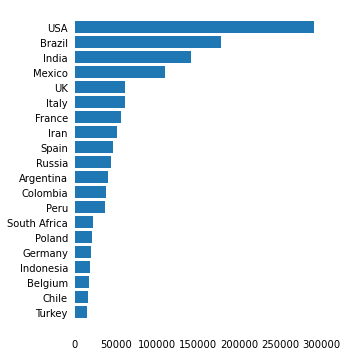

In [8]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
# Code Here
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
   
ax.tick_params(bottom=False, left=False)
plt.show()

<h2>8. Erasing Redundant Data-Ink</h2>
<br>
<div><p>On the previous screen, we erased some non-data ink from our graph. Another way to remove more ink is to erase redundant data-ink. For our horizontal bar plot, we can make the bars less thick and remove some of the x-tick labels (we can leave only the labels 0, 150000, and 300000).</p>
<p><img src="screen7_1.png" alt="img"></p>
<p>To make the bars less thick, we can use the <code>height</code> parameter inside the <code>Axes.barh()</code> method. The <code>height</code> parameter has a default value of <code>0.8</code>. Below, we exaggerate a little for the sake of the example and make the bars very thin, with <code>height=0.1</code>. </p>
<p>To make the bars less thick, we can use the <code>height</code> parameter inside the <code>Axes.barh()</code> method. The <code>height</code> parameter has a default value of <code>0.8</code>. Below, we exaggerate a little for the sake of the example and make the bars very thin, with <code>height=0.1</code>. </p></div>

```python
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.1)
plt.show()
```
<div><p><img src="screen7_2.png" alt="img"></p><p>To remove some of the x-tick labels, we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticks.html" target="_blank"><code>Axes.set_xticks</code> method</a>. Below, we only keep the labels 0, 100000, 200000, and 300000.</p></div>

```python
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
ax.set_xticks([0, 100000, 200000, 300000])
plt.show()
```
<div><p><img src="screen7_3.png" alt="img"></p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Reduce the thickness of each bar to a value of <code>0.45</code>.</li>
<li>Keep only <code>0</code>, <code>150000</code>, and <code>300000</code> as x-tick labels.</li>
</ol>

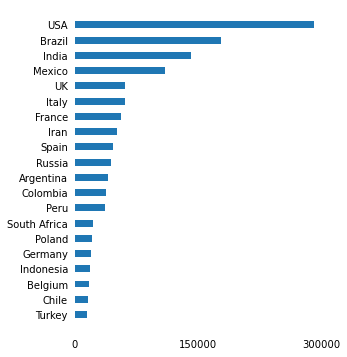

In [9]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
       top20_deathtoll['Total_Deaths'],
#        height=0.45
       )

for location in ['left', 'right', 'top', 'bottom']:
   ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

# ax.set_xticks([0, 150_000, 300_000])

plt.show()

<h2>9. The Direction of Reading</h2>
<br>
<div><p>We've applied two design principles:</p>
<ul>
<li>We chose a horizontal bar graph using the familiarity principle.</li>
<li>We modified the graph using the maximizing data-ink ratio principle.</li>
</ul>
<p>Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom.   More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.</p>
<p>One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities.</p>
<p>To address that, we're going to move the tick labels at the top of the graph using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axis.XAxis.tick_top.html" target="_blank"><code>Axes.xaxis.tick_top()</code> method</a>:</p></div>

```python
# Assume the rest of the code is written
ax.xaxis.tick_top()
```
<div><p><img src="screen8_1.png" alt="img"></p><p>We now see ticks again because we only removed the bottom and left ticks. We now need to remove the top ticks instead of the bottom ones:</p></div>

```python
# Assume the rest of the code is written
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
```

<div><p><img src="screen8_2.png" alt="img"></p><p>Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data, so we'll do two things:</p>
<ul>
<li>We'll color the x-tick labels in grey so they don't stand out visually so much.</li>
<li>We'll color the bars in a shade of red.</li>
</ul>
<p>To color the x-tick labels, we use the same <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html" target="_blank"><code>Axes.tick_params()</code> method</a>. However, we need to call it one more time because we only want to modify the ticks of the x-axis.</p></div>

```python
# Assume the rest of the code is written
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
```

<div><p><img src="screen8_3.png" alt="img"></p><p>To change the colors of the bar, we use the <code>color</code> parameter in the <code>Axes.barh(color)</code> method. This parameter accepts HEX color codes, and we use <code>#af0b1e</code> to get a shade of red. (One place where you can get HEX color codes is <a href="https://www.color-hex.com/" target="_blank">here</a>.)</p></div>

```python
# Assume the rest of the code is written
ax.barh(total_deaths_20['Country_Other'],
        total_deaths_20['Total_Deaths'],
        height=0.45, color='#af0b1e')
```

<div><p><img src="screen8_4.png" alt="img"></p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Color the horizontal bar plot using the HEX color code <code>#af0b1e</code>.</li>
<li>Move the x-tick labels on top and make sure no ticks are visible.</li>
<li>Color the x-tick labels in grey.</li>
</ol>

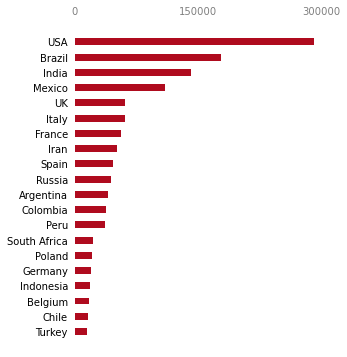

In [14]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, 
#         color='#af0b1e',
       )

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)


ax.set_xticks([0, 150000, 300000])
# code here
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

plt.show()

<h2>10. Title and Subtitle</h2>
<br>
<div><p>If someone looks at our graph, they won't be able to tell what the quantity means. They see the USA has almost 300,000 of something, but what is that something?</p><p><img src="screen9_1.png" alt="img"></p><p>Instead of adding an x-axis label, we'll use the title and subtitle area to give the readers the necessary details. More specifically, we will do the following:</p><ul><li>Add a subtitle that explains what the quantity describes and when the data was collected.</li><li>Use the title to show readers more data — we'll report that the death toll worldwide has surpassed 1.5M (data source: <a href="https://www.worldometers.info/" target="_blank">Worldometers</a>).</li>
</ul><p>Generally, the title must be data ink. If we need to give structural explanations in text, we can use the subtitle. That's because the title is always so noticeable, and we need to leverage that to show more data (and also maximize the data-ink ratio).</p><p>To add a title and a subtitle, we're going to use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html" target="_blank"><code>Axes.text()</code> method</a>. This method expects at least three arguments:</p><ul><li><code>x</code> and <code>y</code>: the coordinates that give the position of the text.</li><li><code>s</code>: the text.</li></ul><p>Below, we add a title and subtitle to a bar plot:</p></div>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example')
ax.text(x=0.5, y=17, s='Subtitle example')
plt.show()
```
<div><p><img src="screen9_2.png" alt="img"></p><p>The <code>Axes.text()</code> method has a <code>size</code> parameter we can use to control the text size. Also, it has a <code>weight</code> parameter that enables us to bold the text.</p></div>

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example',
        size=15, weight='bold')
ax.text(x=0.5, y=17, s='Subtitle example',
        size=12)
plt.show()
```
<div><p><img src="screen9_3.png" alt="img"></p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>
<p>Add the title <code>The Death Toll Worldwide Is 1.5M+</code>. The title should have the following properties:</p>
<ul>
<li>The x-coordinate is <code>-80000</code></li>
<li>The y-coordinate is <code>23.5</code></li>
<li>It is in bold text</li>
<li>It has a font size of <code>17</code></li>
</ul>
</li>
<li>
<p>Add the subtitle <code>Top 20 countries by death toll (December 2020)</code>. The subtitle should have the following properties:</p>
<ul>
<li>The x-coordinate is <code>-80000</code></li>
<li>The y-coordinate is <code>22.5</code></li>
<li>It has a font size of <code>12</code></li>
</ul>
</li>
</ol>

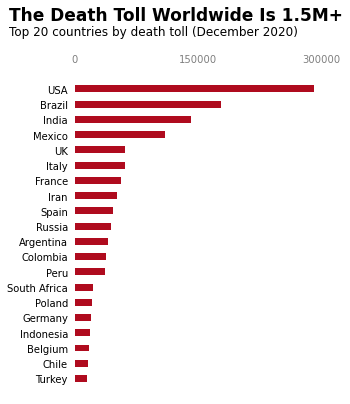

In [15]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

# code here
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
       weight='bold', size=17)
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
       size=12)
plt.show()

<h2>11. Final Touches</h2>
<br>
<p>Next, we're only going to give it some final touches. First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.</p>
<p>To make this change, we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html" target="_blank"><code>Axes.set_xticklabels()</code> method</a>.</p>

```python
# Assume the rest of the code is written
ax.set_xticklabels(['0', '150,000', '300,000'])
```

<div><p><img src="screen10_2.png" alt="img"></p><p>Next, we're going to left-align the y-tick labels (the country names). To do that, we're going to leverage the flexibility of the <code>Axes.text()</code> method. First, however, we're going to remove the current labels using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html" target="_blank"><code>Axes.set_yticklabels()</code> method</a>.</p></div>

```python
# Assume the rest of the code is written
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
```

<div><p><img src="screen10_3.png" alt="img"></p><p>Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the 150,000 value. To do that, we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html" target="_blank"><code>Axes.axvline(x)</code> method</a>, where <code>x</code> is the x-coordinate where the line begins:</p></div>

```python
# Assume the rest of the code is written
ax.axvline(x=150000)
```

<div><p><img src="screen10_4.png" alt="img"></p><p>The color of the vertical line is too bright and stands out more than we want. Moreover, the line spans too far vertically and isn't on the same line with the <code>Turkey</code> label. To fix these problems, we're going to use the following:</p>
<ul>
<li>The <code>ymin</code> parameter to make it shorter — where <code>0</code> is the bottom of the plot, and <code>1</code> is the top of the plot.</li>
<li>The <code>c</code> parameter to change the color to <code>'grey'</code>.</li>
<li>The <code>alpha</code> parameter to add transparency to the line.</li>
</ul></div>

```python
# Assume the rest of the code is written
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
```

<div><p><img src="screen10_5.png" alt="img"></p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Change the x-tick labels to <code>0</code>, <code>150,000</code>, and <code>300,000</code>.</li>
<li>Left-align all y-tick labels. Each label must have the coordinates <code>x=-80000</code> and <code>y=i-0.15</code>, where <code>i</code> is an integer in the <code>range(0, 21)</code>.</li>
<li>Add a vertical line with the following properties:<ul>
<li>Its x-coordinate is <code>150000</code></li>
<li>Its <code>ymin</code> is <code>0.045</code></li>
<li>It has a gray color</li>
<li>It has a transparency of <code>0.5</code></li>
</ul>
</li>
</ol>

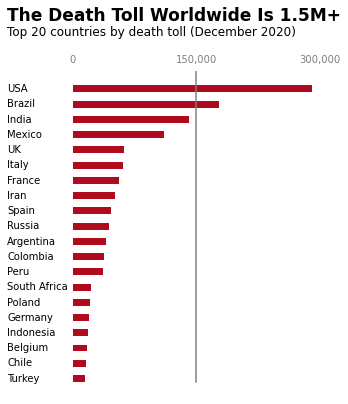

In [18]:
fig, ax = plt.subplots(figsize=(4.5, 6))

ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

ax.set_xticks([0, 150000, 300000])

ax.xaxis.tick_top()

ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

# code here
ax.set_yticklabels([])

ax.set_xticklabels(['0', '150,000', '300,000'])
country_names = top20_deathtoll['Country_Other']

for i, country in zip(range(21), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)

ax.axvline(x=150000, ymin=0.045, color='0.5')
plt.show()